# DAEN 690 Capstone Project

## Import Libraries

In [387]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
import numpy as np

## Importing Dataset, Creating DataFrame, and Standardizing Data

### Upton, NY Dataset

In [388]:
#load Upton, NY Dataset
df = pd.read_csv("USM00072501-data.txt", sep = '\t', header = None)

In [389]:
df

,0
0,#USM00072501 1994 09 03 00 2314 166 ncdc6301 ...
1,21 0 102470B 20 190B 400 140 310 ...
2,20 12 101800B 76B 187B 425 131 315 ...
3,10 48 100000 229B 181B 347 159 327 ...
4,10 324 92500 888B 119B 449 116 339 ...
...,...
3677381,20 9650 787 31915B -557A 31 238 271 ...
3677382,20 9705 776 32006B -551A 31 239 270 ...
3677383,20 9722 763 32112B -548A 32 238 263 ...
3677384,10 9849 700 32667B -555A 34 232 254 ...


In [390]:
#Assigning columns
id_ = []
year = []
month = []
day = []
hour =[]
reltime = []
numlev = []
p_src = []
np_src = []
lat = []
lon = []

lvltyp1 = []
lvltyp2 = []
etime = []
press = []
pflag = []
gph = []
zflag = []
temp = []
tflag = []
rh = []
dpdp = []
wdir = []
wspd = []

for line in df[0]:
    if "USM00072501" in line:
        id_.append(line[0:12].strip())
        year.append(line[13:17].strip())
        month.append(line[17:20].strip())
        day.append(line[20:23])
        hour.append(line[23:26])
        reltime.append(line[27:31])
        numlev.append(line[33:36])
        p_src.append(line[37:45])
        np_src.append(line[46:54])
        lat.append(line[56:62])
        lon.append(line[64:71])
        lvltyp1.append(None)
        lvltyp2.append(None)
        etime.append(None)
        press.append(None)
        pflag.append(None)
        gph.append(None)
        zflag.append(None)
        temp.append(None)
        tflag.append(None)
        rh.append(None)
        dpdp.append(None)
        wdir.append(None)
        wspd.append(None)
    else:
        id_.append(None)
        year.append(None)
        month.append(None)
        day.append(None)
        hour.append(None)
        reltime.append(None)
        numlev.append(None)
        p_src.append(None)
        np_src.append(None)
        lat.append(None)
        lon.append(None)
        lvltyp1.append(line[0:1].strip())
        lvltyp2.append(line[1:2].strip())
        etime.append(line[4:8].strip())
        press.append(line[9:15].strip())
        pflag.append(line[15:16].strip())
        gph.append(line[17:21].strip())
        zflag.append(line[21:22].strip())
        temp.append(line[22:27].strip())
        tflag.append(line[27:28].strip())
        rh.append(line[28:33].strip())
        dpdp.append(line[33:39].strip())
        wdir.append(line[40:45].strip())
        wspd.append(line[46:51].strip())

In [391]:
#Creating DataFrame
upton_df = pd.DataFrame({
    'id_': id_,
    'year': year,
    'month': month,
    'day': day,
    'hour': hour,
    'reltime': reltime,
    'numlev': numlev,
    'p_src': p_src,
    'np_src': np_src,
    'lat': lat,
    'lon': lon,
    'lvltyp1': lvltyp1,
    'lvltyp2': lvltyp2,
    'etime': etime,
    'press': press,
    'pflag': pflag,
    'gph': gph,
    'zflag': zflag,
    'temp': temp,
    'tflag': tflag,
    'rh': rh,
    'dpdp': dpdp,
    'wdir': wdir,
    'wspd': wspd})

In [392]:
#Combining Headers with variables
upton_df['id_'].fillna(method = 'ffill', inplace = True)
upton_df['year'].fillna(method = 'ffill', inplace = True)
upton_df['month'].fillna(method = 'ffill', inplace = True)
upton_df['day'].fillna(method = 'ffill', inplace = True)
upton_df['hour'].fillna(method = 'ffill', inplace = True)
upton_df['reltime'].fillna(method = 'ffill', inplace = True)
upton_df['numlev'].fillna(method = 'ffill', inplace = True)
upton_df['p_src'].fillna(method = 'ffill', inplace = True)
upton_df['np_src'].fillna(method = 'ffill', inplace = True)
upton_df['lat'].fillna(method = 'ffill', inplace = True)
upton_df['lon'].fillna(method = 'ffill', inplace = True)

In [393]:
#Drop rows with null values
upton_df = upton_df.dropna()

In [394]:
#us_df data types
print(upton_df.dtypes)

id_        object
year       object
month      object
day        object
hour       object
reltime    object
numlev     object
p_src      object
np_src     object
lat        object
lon        object
lvltyp1    object
lvltyp2    object
etime      object
press      object
pflag      object
gph        object
zflag      object
temp       object
tflag      object
rh         object
dpdp       object
wdir       object
wspd       object
dtype: object


In [395]:
#Creating dictionary of data types
column_data_types = {
    'id_': str,
    'year': int,
    'month': int,
    'day': int,
    'hour': int,
    'reltime': int,
    'numlev': int,
    'p_src': str,
    'np_src': str,
    'lat': int,
    'lon': int,
    'lvltyp1': int,
    'lvltyp2': int,
    'etime': int,
    'press': int,
    'pflag': str,
    'gph': int,
    'zflag': str,
    'temp': int,
    'tflag': str,
    'rh': int,
    'dpdp': int,
    'wdir': int,
    'wspd': int
}

# Convert headers to the correct data type
upton_df = upton_df.astype(column_data_types)

In [396]:
upton_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,press,pflag,gph,zflag,temp,tflag,rh,dpdp,wdir,wspd
1,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,102470,B,20,,190,B,400,140,310,26
2,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,101800,B,76,B,187,B,425,131,315,31
3,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,100000,,229,B,181,B,347,159,327,50
4,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,92500,,888,B,119,B,449,116,339,67
5,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,90270,,1092,B,100,B,490,103,341,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677381,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,787,,1915,B,-557,A,31,238,271,300
3677382,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,776,,2006,B,-551,A,31,239,270,277
3677383,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,763,,2112,B,-548,A,32,238,263,286
3677384,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,700,,2667,B,-555,A,34,232,254,377


### Albany, NY Dataset

In [397]:
#Loading Albany, NY Dataset
df2 = pd.read_csv("USM00072518-data.txt", sep = '\t', header = None)

In [398]:
df2

,0
0,#USM00072518 1930 01 13 99 2030 6 ...
1,31 -9999 -9999 84 -9999 -9999 -9999 338 ...
2,30 -9999 -9999 250 -9999 -9999 -9999 0 ...
3,30 -9999 -9999 500 -9999 -9999 -9999 45 ...
4,30 -9999 -9999 750 -9999 -9999 -9999 68 ...
...,...
4743858,20 9325 1083 29913B -589B 43 211 271 ...
4743859,20 9404 1034 30202B -600B 48 203 284 ...
4743860,20 9425 1010 30350B -605B 47 204 285 ...
4743861,10 9434 1000 30410B -606B 45 206 283 ...


In [399]:
#Assigning columns
id_2 = []
year2 = []
month2 = []
day2 = []
hour2 =[]
reltime2 = []
numlev2 = []
p_src2 = []
np_src2 = []
lat2 = []
lon2 = []

lvltyp12 = []
lvltyp22 = []
etime2 = []
press2 = []
pflag2 = []
gph2 = []
zflag2 = []
temp2 = []
tflag2 = []
rh2 = []
dpdp2 = []
wdir2 = []
wspd2 = []

for line in df2[0]:
    if "USM00072518" in line:
        id_2.append(line[0:12].strip())
        year2.append(line[13:17].strip())
        month2.append(line[17:20].strip())
        day2.append(line[20:23])
        hour2.append(line[23:26])
        reltime2.append(line[27:31])
        numlev2.append(line[33:36])
        p_src2.append(line[37:45])
        np_src2.append(line[46:54])
        lat2.append(line[56:62])
        lon2.append(line[64:71])
        lvltyp12.append(None)
        lvltyp22.append(None)
        etime2.append(None)
        press2.append(None)
        pflag2.append(None)
        gph2.append(None)
        zflag2.append(None)
        temp2.append(None)
        tflag2.append(None)
        rh2.append(None)
        dpdp2.append(None)
        wdir2.append(None)
        wspd2.append(None)
    else:
        id_2.append(None)
        year2.append(None)
        month2.append(None)
        day2.append(None)
        hour2.append(None)
        reltime2.append(None)
        numlev2.append(None)
        p_src2.append(None)
        np_src2.append(None)
        lat2.append(None)
        lon2.append(None)
        lvltyp12.append(line[0:1].strip())
        lvltyp22.append(line[1:2].strip())
        etime2.append(line[4:8].strip())
        press2.append(line[9:15].strip())
        pflag2.append(line[15:16].strip())
        gph2.append(line[17:21].strip())
        zflag2.append(line[21:22].strip())
        temp2.append(line[22:27].strip())
        tflag2.append(line[27:28].strip())
        rh2.append(line[28:33].strip())
        dpdp2.append(line[33:39].strip())
        wdir2.append(line[40:45].strip())
        wspd2.append(line[46:51].strip())

In [400]:
#Creating DataFrame
albany_df = pd.DataFrame({
    'id_': id_2,
    'year': year2,
    'month': month2,
    'day': day2,
    'hour': hour2,
    'reltime': reltime2,
    'numlev': numlev2,
    'p_src': p_src2,
    'np_src': np_src2,
    'lat': lat2,
    'lon': lon2,
    'lvltyp1': lvltyp12,
    'lvltyp2': lvltyp22,
    'etime': etime2,
    'press': press2,
    'pflag': pflag2,
    'gph': gph2,
    'zflag': zflag2,
    'temp': temp2,
    'tflag': tflag2,
    'rh': rh2,
    'dpdp': dpdp2,
    'wdir': wdir2,
    'wspd': wspd2})

In [401]:
#Combining Headers with variables
albany_df['id_'].fillna(method = 'ffill', inplace = True)
albany_df['year'].fillna(method = 'ffill', inplace = True)
albany_df['month'].fillna(method = 'ffill', inplace = True)
albany_df['day'].fillna(method = 'ffill', inplace = True)
albany_df['hour'].fillna(method = 'ffill', inplace = True)
albany_df['reltime'].fillna(method = 'ffill', inplace = True)
albany_df['numlev'].fillna(method = 'ffill', inplace = True)
albany_df['p_src'].fillna(method = 'ffill', inplace = True)
albany_df['np_src'].fillna(method = 'ffill', inplace = True)
albany_df['lat'].fillna(method = 'ffill', inplace = True)
albany_df['lon'].fillna(method = 'ffill', inplace = True)

In [402]:
#Drop rows with null values
albany_df = albany_df.dropna()

In [403]:
# Convert headers to the correct data type
albany_df = albany_df.astype(column_data_types)

In [404]:
albany_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,press,pflag,gph,zflag,temp,tflag,rh,dpdp,wdir,wspd
1,#USM00072518,1930,1,13,99,2030,6,,cdmp-usm,426919,...,-9999,,84,,-9999,,-9999,-9999,338,20
2,#USM00072518,1930,1,13,99,2030,6,,cdmp-usm,426919,...,-9999,,250,,-9999,,-9999,-9999,0,30
3,#USM00072518,1930,1,13,99,2030,6,,cdmp-usm,426919,...,-9999,,500,,-9999,,-9999,-9999,45,20
4,#USM00072518,1930,1,13,99,2030,6,,cdmp-usm,426919,...,-9999,,750,,-9999,,-9999,-9999,68,20
5,#USM00072518,1930,1,13,99,2030,6,,cdmp-usm,426919,...,-9999,,1000,,-9999,,-9999,-9999,45,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743858,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,1083,,9913,B,-589,B,43,211,271,136
4743859,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,1034,,202,B,-600,B,48,203,284,172
4743860,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,1010,,350,B,-605,B,47,204,285,195
4743861,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,1000,,410,B,-606,B,45,206,283,204


## Preprocessing

## Functions

### Temperature converts to Fahrenheit

In [405]:
def temp_to_fahrenheit(celcius_input):
    if celcius_input == -9999:
        return -9999
    elif celcius_input == -8888:
        return -8888
    else:
        return ((celcius_input/10)*(9/5)) + 32

### Temperature converts to Kelvin

In [406]:
def temp_to_kelvin(celcius_input):
    if celcius_input == -9999:
        return -9999
    elif celcius_input == -8888:
        return -8888
    else:
        return (celcius_input/10) + 273.15

### Relative Humidity to Ice

Relative Humidity to Ice Equation
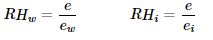
Saturation Water Vapor Pressure
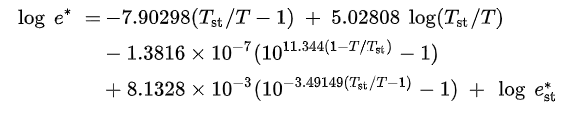
Saturation Water Vapor Pressure Over Ice
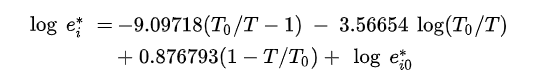

In [407]:
#Logic
#1. Create an empty array to store the rh_ice values
#2. If not a null value proceed
#3. Standardize relative humidity to a decimal value
#4. Calculate saturation water vapor pressure
#5. Calculate saturation water vapor pressure over ice
#6.Calculate actual vapor pressure
#7. Calculatew relative humidity to ice
#8. Return relative humidity to ice values

def relative_humidity_to_ice(temp_k, rh_w):
    
    # Initialize an empty array to store all calculations to be returned
    rh_ice = np.empty(len(temp_k))
    
    # Create a condition that if the value is not one of the following, the value is saved
    condition = (temp_k != -9999) & (temp_k != -8888) & (rh_w != -9999) & (rh_w != -8888)

    # Calculate rh_ice for non-null values
    t_non_null = temp_k[condition]
    #We divide first by 10 to standardize relative humidity (rh) to a percentage (ex: 11 = 1.1%). 
    #We than convert the percentage into a decimal value by dividing by 100. 
    rh_w_non_null = (rh_w[condition] / 10) / 100  
    
    # Ensure temperature is a non-zero number so we do not divide by 0. 
    t = t_non_null[t_non_null != 0]
    
    #Values needed for Goff-Gratch Equation
    t_st = 373.13 #steam-point temperature
    e_st = 1013.25 #steam-point pressure
    to = 273.16 #ice-point (triple point) temperature
    e_i0 = 6.1173 #ice-point pressure
    
    log_ew = -7.90298 * (t_st / t - 1) + 5.02808 * np.log10(t_st / t) \
             - 1.3816e-7 * (10**(11.344 * (1 - t / t_st)) - 1) \
             + 8.1328e-3 * (10**(-3.49149 * (t_st / t - 1)) - 1) + np.log10(e_st)
    
    ew = np.exp(log_ew)
    
    #Calculate log_ei (Saturation Water Vapor Pressure Over Ice)
    log_ei = -9.09718 * (to / t - 1) - 3.56654 * np.log10(to / t) + 0.876793 * (1 - t / to) \
             + np.log10(e_i0)
    ei = np.exp(log_ei)

    #Calculate actual vapor pressure
    e_press = rh_w_non_null * ew
    
    #Calculcate relative humidity to ice
    rh_ice[condition] = e_press / ei
    
    #If value was -9999 or -8888, assigning -9999 value
    rh_ice[~condition] = -9999
    
    #Return all values calculated
    return rh_ice

### Pressure to Pressure Altitude

In [408]:
def calculate_pressure_altitude(pressure):
    if pressure == -9999:
        return -9999    
    pressure /= 100

    pressure_altitude = (1 - (pressure / 1013.25) ** 0.190284) * 145366.45
    return round(pressure_altitude, 2)

### Capture When Temp below -42 Fahrenheit, RH above 100%, and pressure altitude below 43,000 feet

In [409]:
def issr(temp_f, rhi, press_alt):
    result = pd.Series('no', index = temp_f.index)
    
    result[(temp_f < -42) & (rhi > 1) & (press_alt < 43000)] = 'yes'
    
    return result

## Adding Conversions to DataFrames

### Filter to 2010-2024

In [410]:
#Filtering dataset to 2000-2024 data due to both datasets containing millions of rows
upton_df2 = upton_df[(upton_df['year'] >= 2010) & (upton_df['year'] <= 2024)]

### Adding Conversions to Upton DataFrame

In [411]:
#Fahrenheit
condition = (upton_df2['temp'] != -9999) & (upton_df2['temp'] != -8888)
upton_df2['temp_f'] = upton_df2['temp']
upton_df2.loc[condition, 'temp_f'] = upton_df2.loc[condition, 'temp_f'] /10 * (9/5) + 32

In [412]:
#Kelvins
condition2 = (upton_df2['temp'] != -9999) & (upton_df2['temp'] != -8888)
upton_df2['temp_k'] = upton_df2['temp']
upton_df2.loc[condition2, 'temp_k'] = upton_df2.loc[condition2, 'temp_k'] / 10 + 273.15

In [413]:
#Pressure Altitude
condition3 = (upton_df2['press'] != -9999) & (upton_df2['press'] != -8888)
upton_df2['press_alt'] = upton_df2['press'] / 100
upton_df2.loc[condition3, 'press_alt'] = round(((1 - (upton_df2.loc[condition3, 'press_alt'] / 1013.25) ** 0.190284) \
                                                * 145366.45), 2)

In [414]:
upton_df2['rh_ice'] = relative_humidity_to_ice(upton_df2['temp_k'], upton_df2['rh'])
upton_df2['rh_ice'] = upton_df2['rh_ice'].round(3)

In [415]:
upton_df2['issc'] = issr(upton_df2['temp_f'], upton_df2['rh_ice'], upton_df2['press_alt'])

In [416]:
upton_df2

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
1800607,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,B,890,16,0,0,32.18,273.25,-75.81,0.890,no
1800608,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,B,888,16,45,18,32.00,273.15,-53.46,0.888,no
1800609,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,B,871,19,47,36,31.64,272.95,134.03,0.872,no
1800610,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,B,970,4,44,49,31.10,272.65,363.64,0.972,no
1800611,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,B,998,0,38,42,30.74,272.45,643.75,1.001,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677381,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,A,31,238,271,300,-68.26,217.45,87687.94,0.039,no
3677382,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,A,31,239,270,277,-67.18,218.05,87842.21,0.039,no
3677383,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,A,32,238,263,286,-66.64,218.35,88026.84,0.040,no
3677384,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,A,34,232,254,377,-67.90,217.65,88959.45,0.043,no


In [417]:
upton_df2[(upton_df2['rh_ice'] > 1)]

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
1800611,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,B,998,0,38,42,30.74,272.45,643.75,1.001,no
1800612,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,B,1000,0,277,31,31.28,272.75,1317.79,1.002,no
1800618,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,B,1000,0,216,98,31.46,272.85,4272.30,1.001,no
1801644,#USM00072501,2010,1,4,0,2313,176,ncdc6301,ncdc6301,408650,...,B,977,3,359,211,14.72,263.55,3905.51,1.018,no
1801645,#USM00072501,2010,1,4,0,2313,176,ncdc6301,ncdc6301,408650,...,B,1000,0,4,165,21.02,267.05,4361.99,1.026,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657797,#USM00072501,2023,12,28,12,1109,172,ncdc-nws,ncdc-gts,408650,...,B,838,15,198,244,-45.04,230.35,29010.95,1.003,yes
3662854,#USM00072501,2024,1,9,12,1108,176,ncdc-nws,ncdc-gts,408650,...,B,990,1,148,64,26.96,270.35,-162.59,1.002,no
3663052,#USM00072501,2024,1,10,0,2310,106,ncdc-nws,ncdc-gts,408650,...,B,1000,0,213,329,24.08,268.75,12220.24,1.019,no
3663053,#USM00072501,2024,1,10,0,2310,106,ncdc-nws,ncdc-gts,408650,...,B,997,0,216,340,24.80,269.15,12359.78,1.014,no


In [440]:
upton_df2[(upton_df2['issc'] == 'yes') & (upton_df2['year'] == 2023)]

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
3540108,#USM00072501,2023,1,25,21,2034,86,ncdc-nws,,408650,...,A,781,18,254,586,-78.70,211.65,37630.09,1.003,yes
3551410,#USM00072501,2023,4,1,12,1104,170,ncdc-nws,ncdc-gts,408650,...,B,794,17,281,523,-73.66,214.45,36472.12,1.010,yes
3551415,#USM00072501,2023,4,1,12,1104,170,ncdc-nws,ncdc-gts,408650,...,B,809,15,281,466,-86.44,207.35,39597.97,1.053,yes
3551417,#USM00072501,2023,4,1,12,1104,170,ncdc-nws,ncdc-gts,408650,...,B,783,17,275,502,-91.48,204.55,41130.90,1.027,yes
3555423,#USM00072501,2023,4,23,12,1114,154,ncdc-nws,ncdc-gts,408650,...,B,898,9,192,338,-61.06,221.45,32610.58,1.113,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619849,#USM00072501,2023,9,23,12,1148,233,ncdc-nws,ncdc-gts,408650,...,B,802,15,207,354,-87.70,206.65,42490.07,1.046,yes
3620279,#USM00072501,2023,9,24,12,1106,207,ncdc-nws,ncdc-gts,408650,...,B,855,14,222,168,-43.06,231.45,32960.50,1.019,yes
3622409,#USM00072501,2023,9,29,12,1105,230,ncdc-nws,ncdc-gts,408650,...,B,814,17,222,265,-58.00,223.15,33984.70,1.003,yes
3622410,#USM00072501,2023,9,29,12,1105,230,ncdc-nws,ncdc-gts,408650,...,B,848,13,224,273,-59.26,222.45,34338.92,1.047,yes


### Filter to 2010-2024

In [419]:
#Filtering dataset to 2000-2024 data due to both datasets containing millions of rows
albany_df2 = albany_df[(albany_df['year'] >= 2010) & (albany_df['year'] <= 2024)]

### Adding Conversions to Albany DataFrame

In [420]:
#Fahrenheit
condition = (albany_df2['temp'] != -9999) & (albany_df2['temp'] != -8888)
albany_df2['temp_f'] = albany_df2['temp']
albany_df2.loc[condition, 'temp_f'] = albany_df2.loc[condition, 'temp_f'] /10 * (9/5) + 32

In [421]:
#Kelvins
condition2 = (albany_df2['temp'] != -9999) & (albany_df2['temp'] != -8888)
albany_df2['temp_k'] = albany_df2['temp']
albany_df2.loc[condition2, 'temp_k'] = albany_df2.loc[condition2, 'temp_k'] / 10 + 273.15

In [422]:
#Pressure Altitude
condition3 = (albany_df2['press'] != -9999) & (albany_df2['press'] != -8888)
albany_df2['press_alt'] = albany_df2['press'] / 100
albany_df2.loc[condition3, 'press_alt'] = round(((1 - (albany_df2.loc[condition3, 'press_alt'] / 1013.25) ** 0.190284) \
                                                * 145366.45), 2)

In [423]:
albany_df2['rh_ice'] = relative_humidity_to_ice(albany_df2['temp_k'], albany_df2['rh'])
albany_df2['rh_ice'] = albany_df2['rh_ice'].round(3)

In [424]:
albany_df2['issc'] = issr(albany_df2['temp_f'], albany_df2['rh_ice'], albany_df2['press_alt'])

In [425]:
albany_df2

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
3039799,#USM00072518,2010,1,1,0,0,146,ncdc6301,ncdc6301,426919,...,B,890,16,160,15,29.12,271.55,193.00,0.896,no
3039800,#USM00072518,2010,1,1,0,0,146,ncdc6301,ncdc6301,426919,...,B,903,14,165,21,27.86,270.85,363.64,0.912,no
3039801,#USM00072518,2010,1,1,0,0,146,ncdc6301,ncdc6301,426919,...,B,940,8,182,51,24.98,269.25,1547.57,0.956,no
3039802,#USM00072518,2010,1,1,0,0,146,ncdc6301,ncdc6301,426919,...,B,963,5,204,41,30.74,272.45,2152.09,0.966,no
3039803,#USM00072518,2010,1,1,0,0,146,ncdc6301,ncdc6301,426919,...,B,926,11,211,39,29.48,271.75,2498.86,0.932,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743858,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,B,43,211,271,136,-74.02,214.25,84075.32,0.055,no
4743859,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,B,48,203,284,172,-76.00,213.15,84612.93,0.061,no
4743860,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,B,47,204,285,195,-76.90,212.65,84883.82,0.060,no
4743861,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,B,45,206,283,204,-77.08,212.55,84998.23,0.058,no


In [426]:
albany_df2[(albany_df2['issc'] == 'yes') & (albany_df2['year'] == 2023)]

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
4699821,#USM00072518,2023,11,21,18,1721,226,ncdc-nws,ncdc-gts,426919,...,A,802,16,269,629,-81.04,210.35,38353.36,1.034,yes


## Filter Dataset (Data from 2023 AND Pressure Altitude Under 43,000)

In [427]:
#Filter and create new DataFrame. New U.S. DataFrame is all data that is in the year 2023 and 
#pressure altitude is under 4,300 ft.
new_upton_df = upton_df2[(upton_df2['year'] == 2023) & (upton_df2['press_alt'] <= 43000)]

In [428]:
#Filter and create new DataFrame. New Canada DataFrame is all data that is in the year 2023 and 
#pressure altitude is under 4,300 ft.
new_albany_df = albany_df2[(albany_df2['year'] == 2023) & (albany_df2['press_alt'] <= 43000)]

## Finalized Cleaned Datasets for Analysis

In [429]:
new_upton_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
3536356,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,1000,0,360,0,49.28,282.75,204.26,0.961,no
3536357,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,937,10,279,74,50.72,283.55,363.37,0.897,no
3536358,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,872,20,273,106,51.62,284.05,564.00,0.833,no
3536359,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,818,30,283,130,51.80,284.15,863.67,0.781,no
3536360,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,772,38,289,142,51.26,283.85,1131.57,0.738,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659269,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,,-9999,-9999,15,87,-9999.00,-9999.00,-99.99,-9999.000,no
3659270,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,,-9999,-9999,15,72,-9999.00,-9999.00,-99.99,-9999.000,no
3659271,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,,-9999,-9999,30,159,-9999.00,-9999.00,-99.99,-9999.000,no
3659272,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,,-9999,-9999,10,62,-9999.00,-9999.00,-99.99,-9999.000,no


In [430]:
new_albany_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
4680624,#USM00072518,2023,1,5,18,1631,33,ncdc-gts,,426919,...,A,-9999,38,180,21,43.88,279.75,225.96,-9999.0,no
4680625,#USM00072518,2023,1,5,18,1631,33,ncdc-gts,,426919,...,A,-9999,18,155,31,45.32,280.55,363.64,-9999.0,no
4680626,#USM00072518,2023,1,5,18,1631,33,ncdc-gts,,426919,...,A,-9999,6,155,15,38.84,276.95,2498.86,-9999.0,no
4680627,#USM00072518,2023,1,5,18,1631,33,ncdc-gts,,426919,...,,-9999,-9999,200,51,-9999.00,-9999.00,3726.06,-9999.0,no
4680628,#USM00072518,2023,1,5,18,1631,33,ncdc-gts,,426919,...,A,-9999,11,235,67,31.46,272.85,4779.19,-9999.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4716617,#USM00072518,2023,12,31,12,1109,231,ncdc-nws,ncdc-gts,426919,...,,-9999,-9999,10,77,-9999.00,-9999.00,-99.99,-9999.0,no
4716618,#USM00072518,2023,12,31,12,1109,231,ncdc-nws,ncdc-gts,426919,...,,-9999,-9999,360,82,-9999.00,-9999.00,-99.99,-9999.0,no
4716619,#USM00072518,2023,12,31,12,1109,231,ncdc-nws,ncdc-gts,426919,...,,-9999,-9999,10,118,-9999.00,-9999.00,-99.99,-9999.0,no
4716620,#USM00072518,2023,12,31,12,1109,231,ncdc-nws,ncdc-gts,426919,...,,-9999,-9999,5,87,-9999.00,-9999.00,-99.99,-9999.0,no


## ISS Conditions Exploratory Data Analysis

[Text(0.5, 1.0, 'Upton, NY ISS-Likely Regions')]

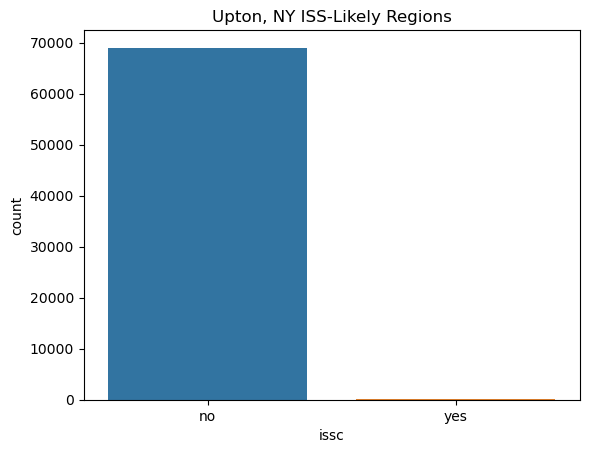

In [431]:
sns.countplot(x = 'issc', data = new_upton_df).set(title = 'Upton, NY ISS-Likely Regions')

[Text(0.5, 1.0, 'Albany, NY ISS-Likely Regions')]

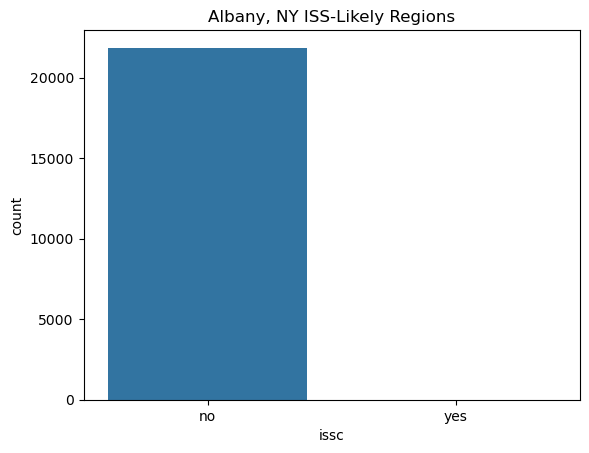

In [432]:
sns.countplot(x = 'issc', data = new_albany_df).set(title = 'Albany, NY ISS-Likely Regions')

### ISS Conditions were present in the region X% of days a month

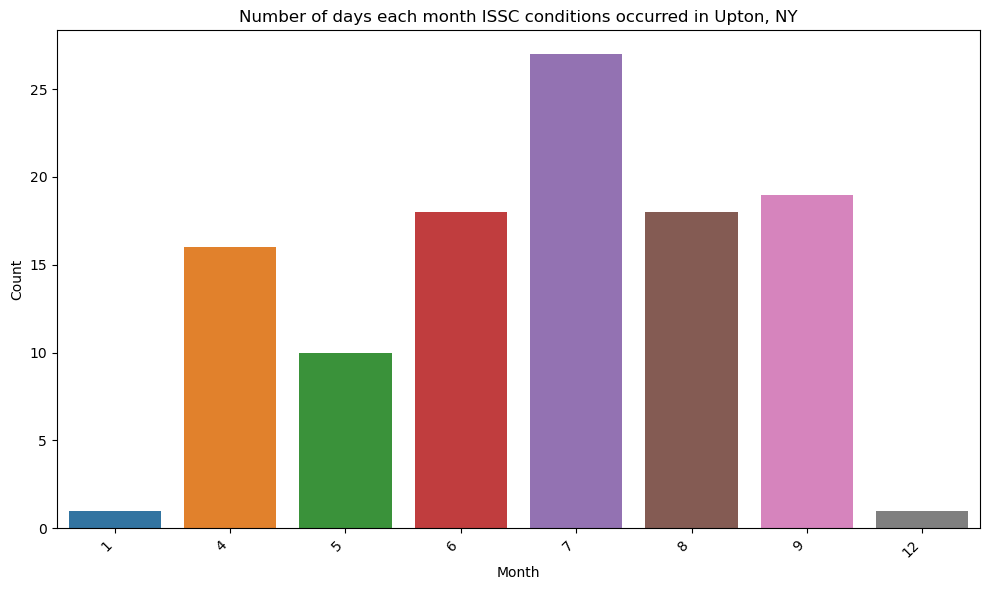

In [444]:
#Capture all days ISSC occurred
issc_yes = new_upton_df[new_upton_df['issc'] == "yes"]

#Groupby Month
df_counts = issc_yes.groupby('month').size()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x = df_counts.index, y = df_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Number of days each month ISSC conditions occurred in Upton, NY')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

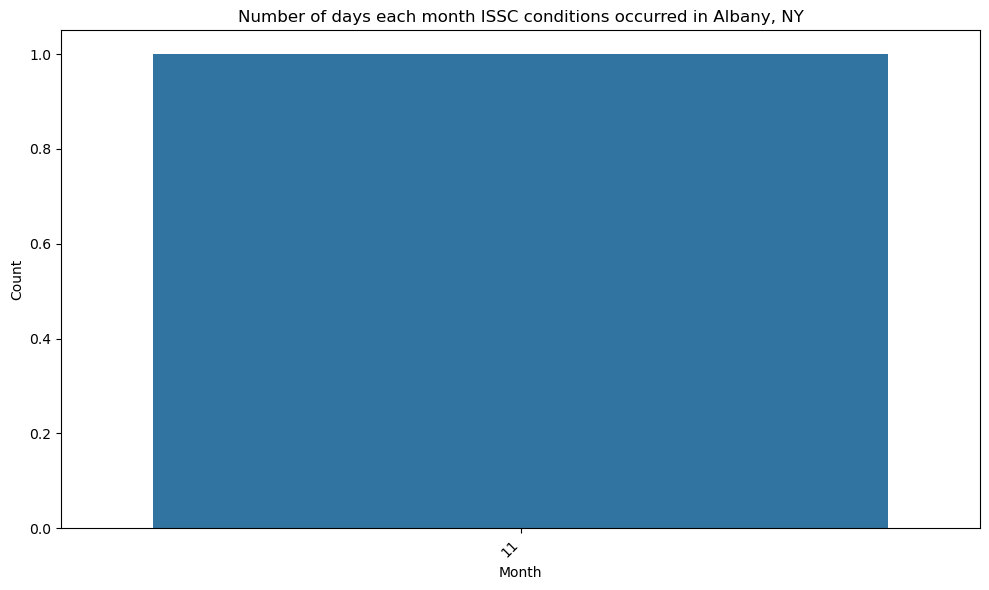

In [445]:
#Capture all days ISSC occurred
issc_yes = new_albany_df[new_albany_df['issc'] == "yes"]

#Groupby Month
df_counts = issc_yes.groupby('month').size()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x = df_counts.index, y = df_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Number of days each month ISSC conditions occurred in Albany, NY')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()